<a href="https://colab.research.google.com/github/Ikwuegbu/Git-Checkpoint/blob/main/Data_Visualization_with_Python_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Load the Dataset into a Dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/Africa_climate_change.csv')

# Display the first few rows of the dataset
print(df.head())

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon


In [14]:
#Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Check the data types to ensure correct types
print(df_cleaned.dtypes)

# Convert date column to datetime if not already done
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])

# Display summary statistics to check for outliers or inconsistent data
df_cleaned.describe()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64
DATE        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
COUNTRY     object
dtype: object


<ipython-input-14-83947f700cb1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'])


,DATE,PRCP,TAVG,TMAX,TMIN
count,113737,113737.000000,113737.000000,113737.000000,113737.000000
mean,1998-03-25 14:59:56.486631552,0.114734,74.432067,85.485990,63.736269
min,1980-01-01 00:00:00,0.000000,37.000000,44.000000,12.000000
25%,1990-10-13 00:00:00,0.000000,65.000000,76.000000,54.000000
50%,1996-12-16 00:00:00,0.000000,78.000000,88.000000,67.000000
75%,2005-01-19 00:00:00,0.000000,83.000000,95.000000,74.000000
max,2023-08-23 00:00:00,19.690000,108.000000,123.000000,97.000000
std,NaN,0.472912,12.275744,13.391851,12.339069


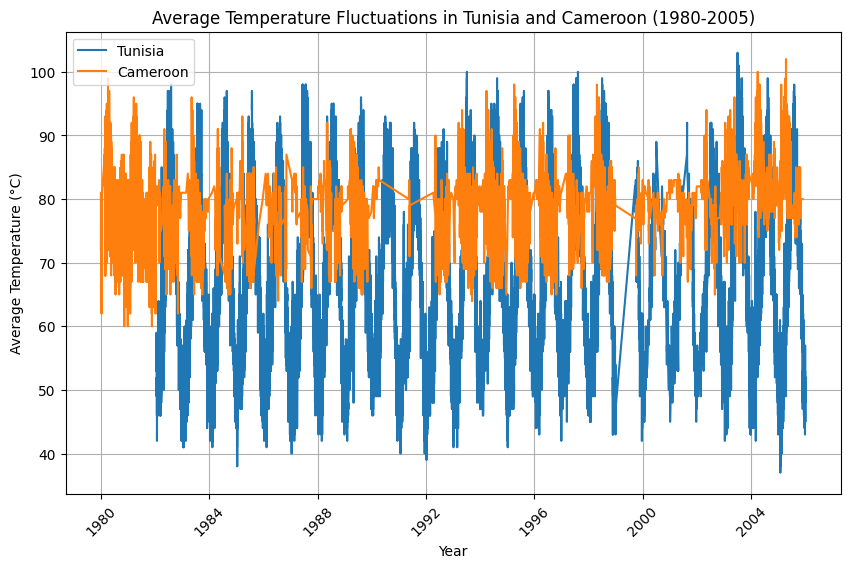

In [16]:
#Plot a line chart to show average tempertaure fluctuations in Tunisia and Cameroon
import matplotlib.pyplot as plt

# Filter data for Tunisia and Cameroon
df_filtered = df_cleaned[df_cleaned['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

# Filter data between 1980 and 2005
df_filtered = df_filtered[(df_filtered['DATE'] >= '1980-01-01') & (df_filtered['DATE'] <= '2005-12-31')]

# Plot line chart
plt.figure(figsize=(10, 6))
for country in ['Tunisia', 'Cameroon']:
    country_data = df_filtered[df_filtered['COUNTRY'] == country]
    plt.plot(country_data['DATE'], country_data['TAVG'], label=country)

# Customizing the axes labels and title
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

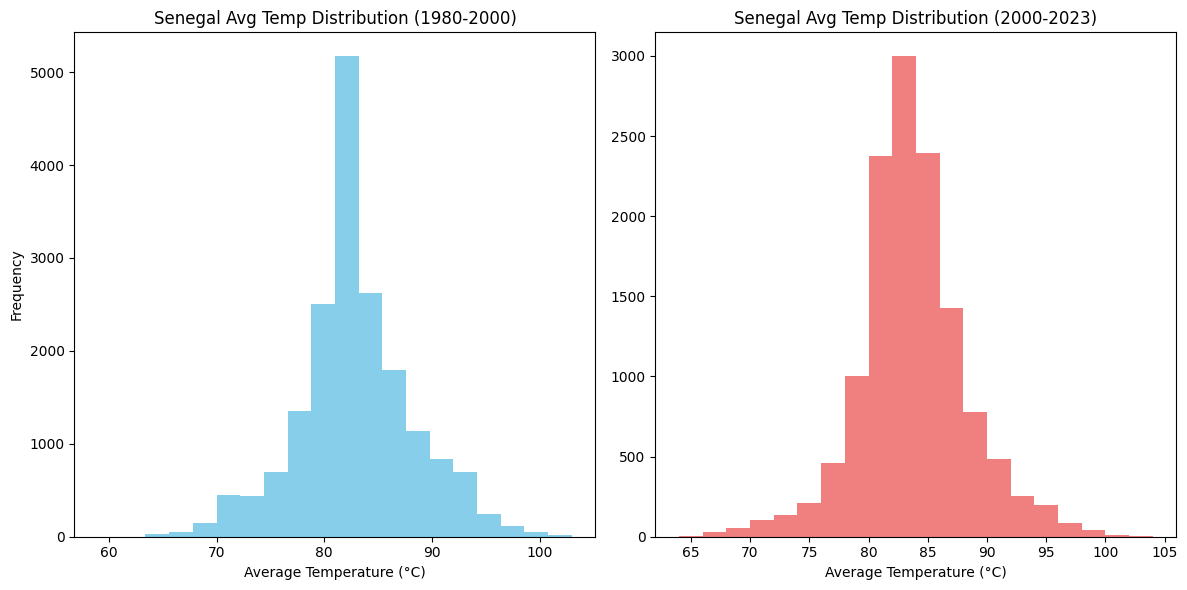

In [17]:
#Create Histograms to Show Temperature Distribution in Senegal for Two Periods
# Filter data for Senegal
df_senegal = df_cleaned[df_cleaned['COUNTRY'] == 'Senegal']

# Filter data for two periods: 1980-2000 and 2000-2023
senegal_80_00 = df_senegal[(df_senegal['DATE'] >= '1980-01-01') & (df_senegal['DATE'] <= '2000-12-31')]
senegal_00_23 = df_senegal[(df_senegal['DATE'] >= '2000-01-01') & (df_senegal['DATE'] <= '2023-12-31')]

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(senegal_80_00['TAVG'], bins=20, color='skyblue')
plt.title('Senegal Avg Temp Distribution (1980-2000)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(senegal_00_23['TAVG'], bins=20, color='lightcoral')
plt.title('Senegal Avg Temp Distribution (2000-2023)')
plt.xlabel('Average Temperature (°C)')

plt.tight_layout()
plt.show()

<ipython-input-18-06eb3053f343>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='TAVG', data=avg_temp_by_country, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When group

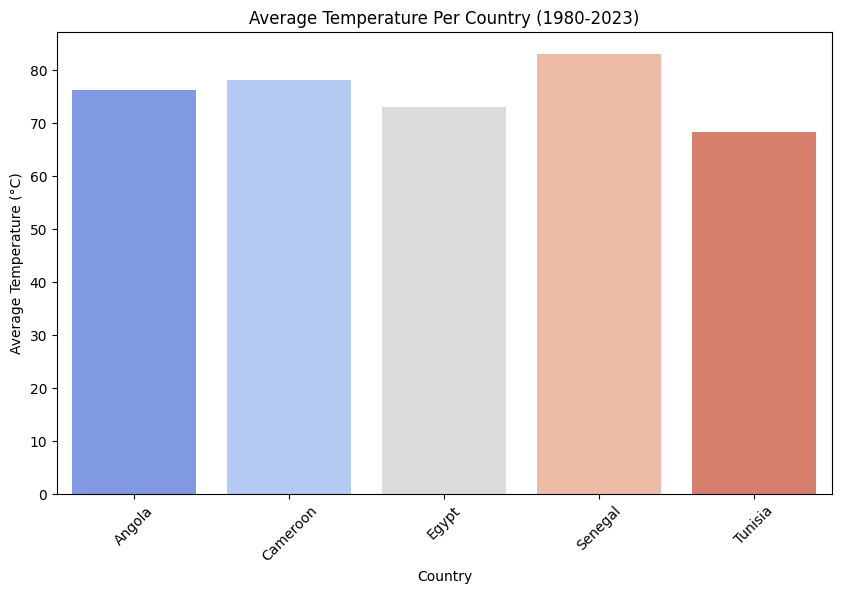

In [18]:
 #Select the Best Chart to Show the Average Temperature per Country
 import seaborn as sns

# Group data by country to get average temperature per country
avg_temp_by_country = df_cleaned.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='COUNTRY', y='TAVG', data=avg_temp_by_country, palette='coolwarm')

# Customizing the chart
plt.title('Average Temperature Per Country (1980-2023)')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

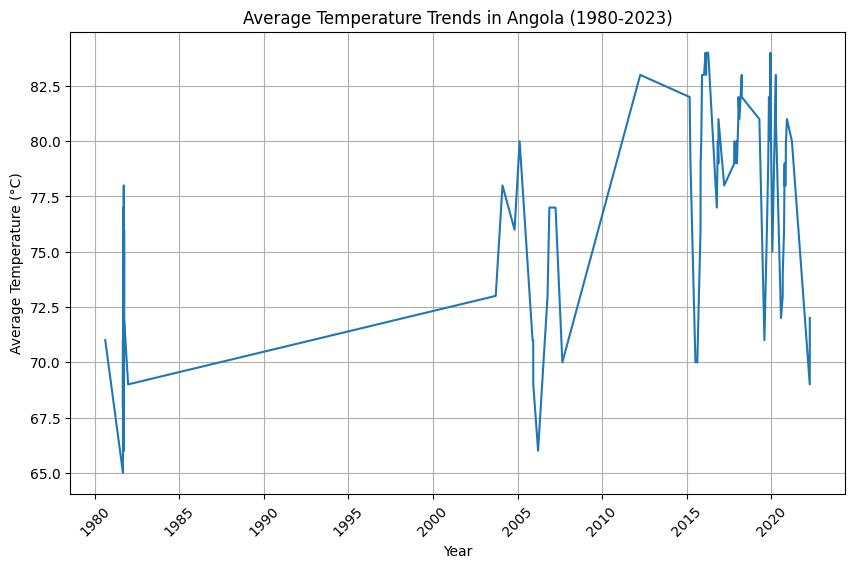

In [19]:
#Ask Your Own Questions and Visualize
#Has there been an increasing trend in average temperature in Angola?
# Filter data for Angola
df_angola = df_cleaned[df_cleaned['COUNTRY'] == 'Angola']

# Plot line chart for Angola's temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df_angola['DATE'], df_angola['TAVG'], label='Angola')

# Customizing the axes labels and title
plt.title('Average Temperature Trends in Angola (1980-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
